# <center style="font-family:Arial">1. Introduction </center>

<div class="alert alert-block alert-info"
     style="color:black;
           display:fill;
           background-color:#e8f4f8;
           font-size:130%;
           font-family:Arial"><center>
<b> 📌 My Create a model to predict whether or not a customer will Churn .</b></center>
    </div>
    
 <div style="color:black;
           font-size:120%;
           font-family:Arial">
Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.

It's hard to measure success if you don't measure the inevitable failures, too. While you strive for 100% of customers to stick with your company, that's simply unrealistic. That's where customer churn comes in. If you want to know more about the data, you can click <a href="https://www.kaggle.com/blastchar/telco-customer-churn" target="_blank"> here</a>.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Telco-Customer-Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### This dataset does not have any null values and 4 features are numeric while the rest are catagorical.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


We should set customerid column as index of df.

In [8]:
df.set_index('customerID')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


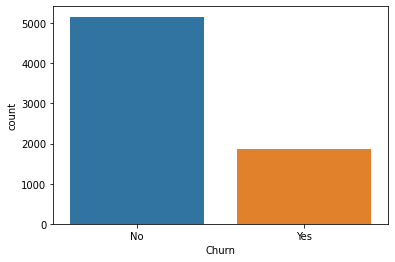

In [9]:
# How balanced is the dataset
sns.countplot(data=df, x = 'Churn')

### Does monthly charges have any relationship with churn?

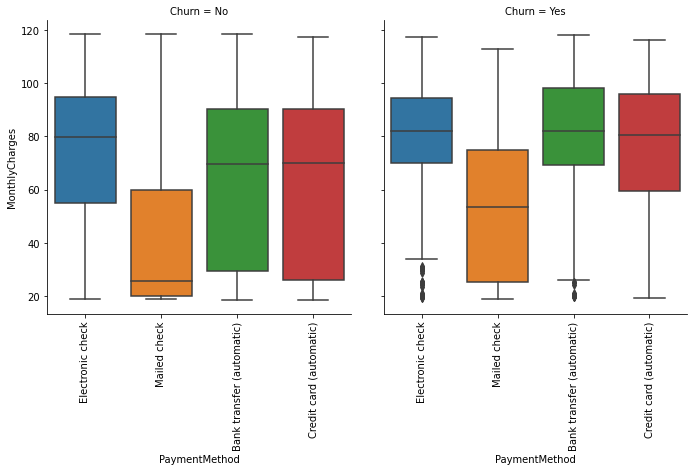

In [10]:
chart = sns.catplot(data=df, x = 'PaymentMethod', y='MonthlyCharges', col = 'Churn', kind = 'box')
chart.set_xticklabels(rotation = 90);

### In the above graph we can conclude that people paying higher bills tend to churn more as we can see the same trend for all the payment method categories.
---
Does tech support have anything to do with tech support.

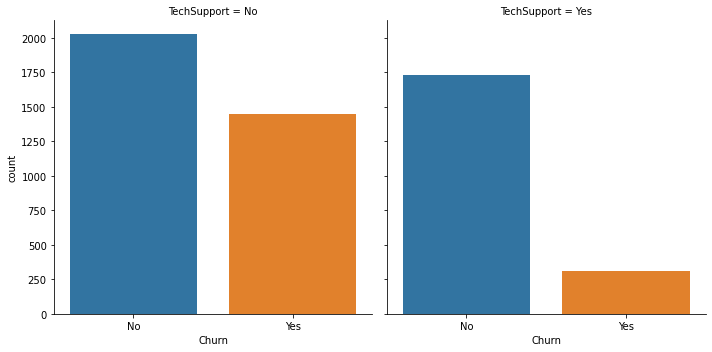

In [11]:
sns.catplot(data=df[df['TechSupport']!='No internet service'], col = 'TechSupport', x = 'Churn', kind='count')

### It can be concluded that for the group of people who did not have tech support churn rate was higher.
---
Converting categorical variables to numeric variables. But first lets get rid of customerid and get a list of categorical columns.

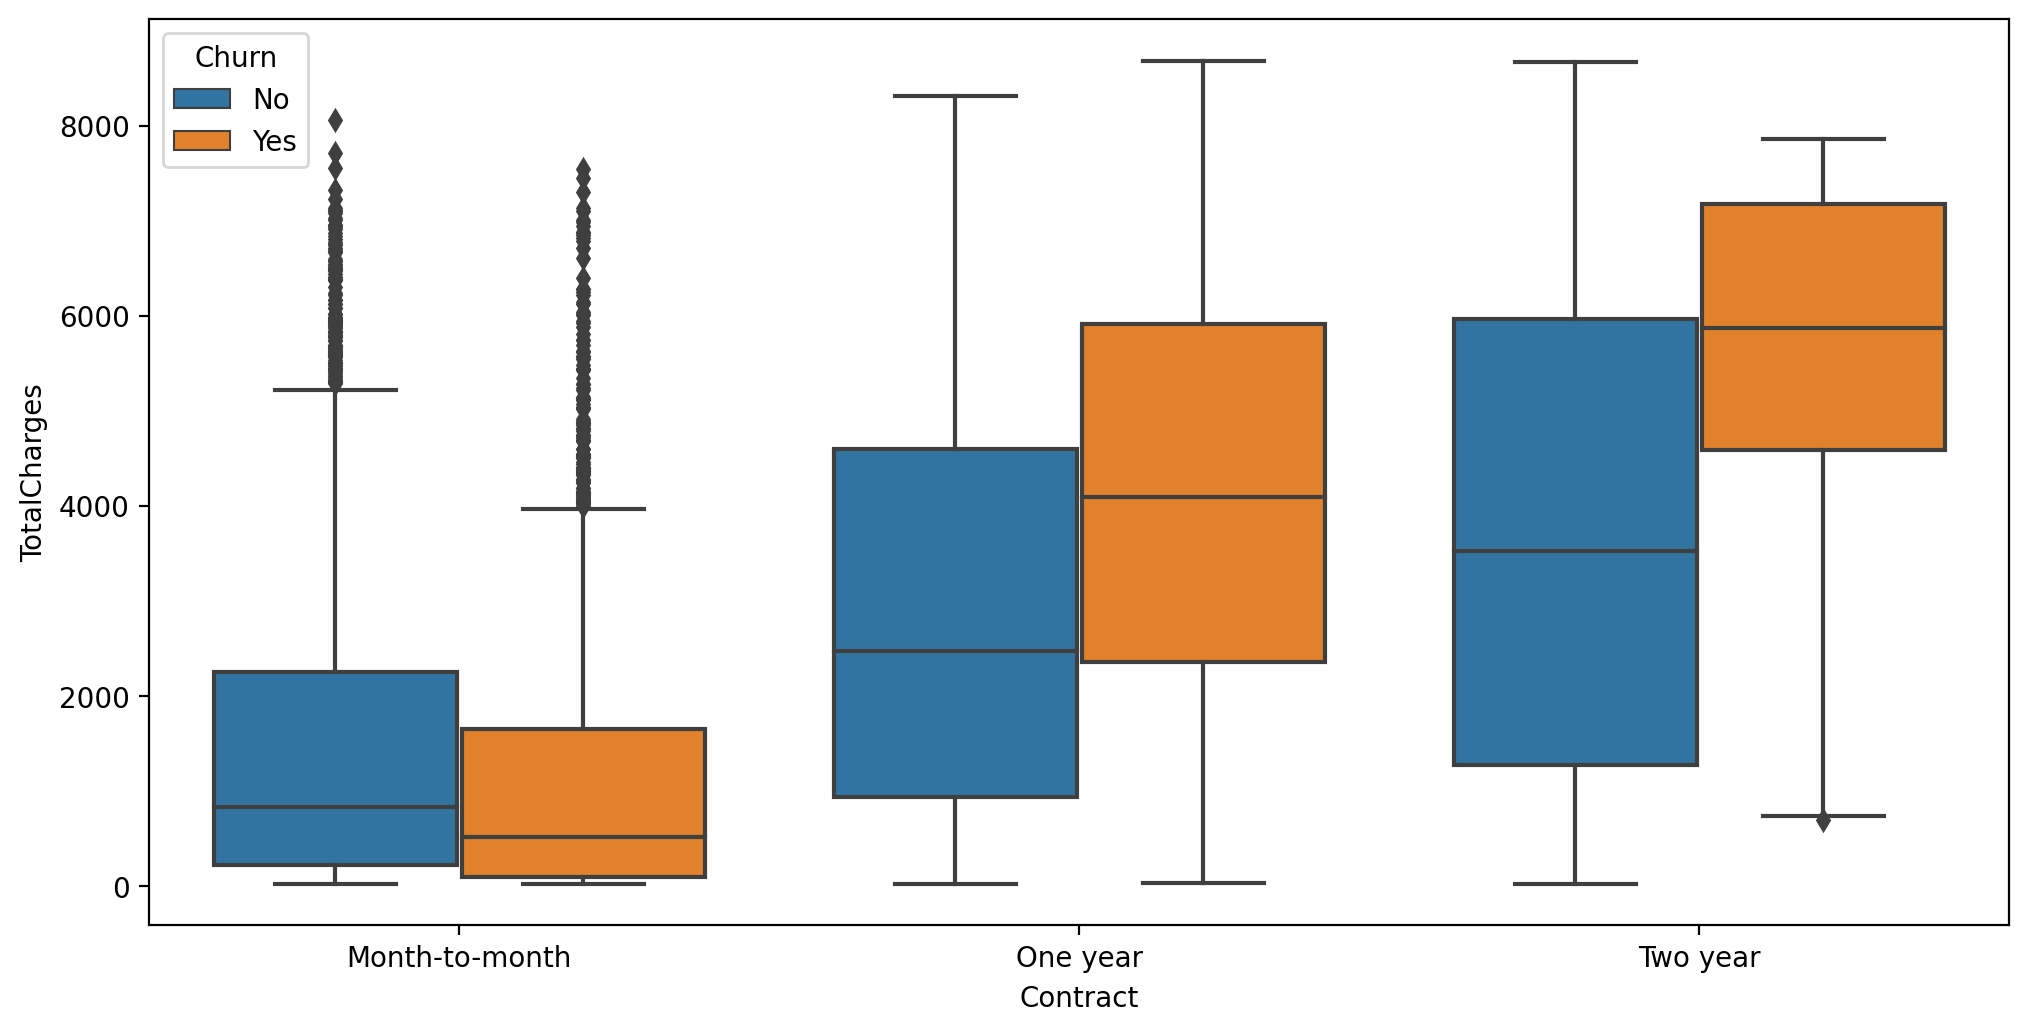

In [12]:
plt.figure(figsize=(12,6), dpi = 200)
sns.boxplot(data=df, x='Contract', y = 'TotalCharges', hue='Churn');

In [13]:
df.groupby('Contract').size()

Contract
Month-to-month    3875
One year          1472
Two year          1685
dtype: int64

### Customers with one and two years contract tend to churn out more and majority of customers have month to month contract. Lets create a pair plot of categorical columns.

First lets convert categorical columns into dummy variables.

### Visualizing churning rate along with tenure.

In [14]:
ten_group = df.groupby(['tenure','Churn'])['Churn'].count()
ten_group = pd.DataFrame(ten_group)
ten_group

Churn
tenure Churn       
1      No       233
       Yes      380
2      No       115
       Yes      123
3      No       106
...             ...
70     Yes       11
71     No       164
       Yes        6
72     No       356
       Yes        6

[144 rows x 1 columns]

In [15]:
ten_nos = df.groupby(['tenure'])['Churn'].count()
ten_nos = pd.DataFrame(ten_nos).reset_index()
ten_nos=dict(zip(ten_nos.tenure,ten_nos.Churn))

In [16]:
ten_group.columns = ['Churn_nos']
ten_group=ten_group.reset_index()

In [17]:
ten_group['Total']=ten_group['tenure'].map(lambda x:ten_nos[x])
ten_group=ten_group[ten_group['Churn']=='Yes']
ten_group=ten_group.drop('Churn',axis=1)
ten_group['Churn%'] = ten_group['Churn_nos']*100/ten_group['Total']
ten_group

,tenure,Churn_nos,Total,Churn%
1,1,380,613,61.990212
3,2,123,238,51.680672
5,3,94,200,47.000000
7,4,83,176,47.159091
9,5,64,133,48.120301
...,...,...,...,...
135,68,9,100,9.000000
137,69,8,95,8.421053
139,70,11,119,9.243697
141,71,6,170,3.529412


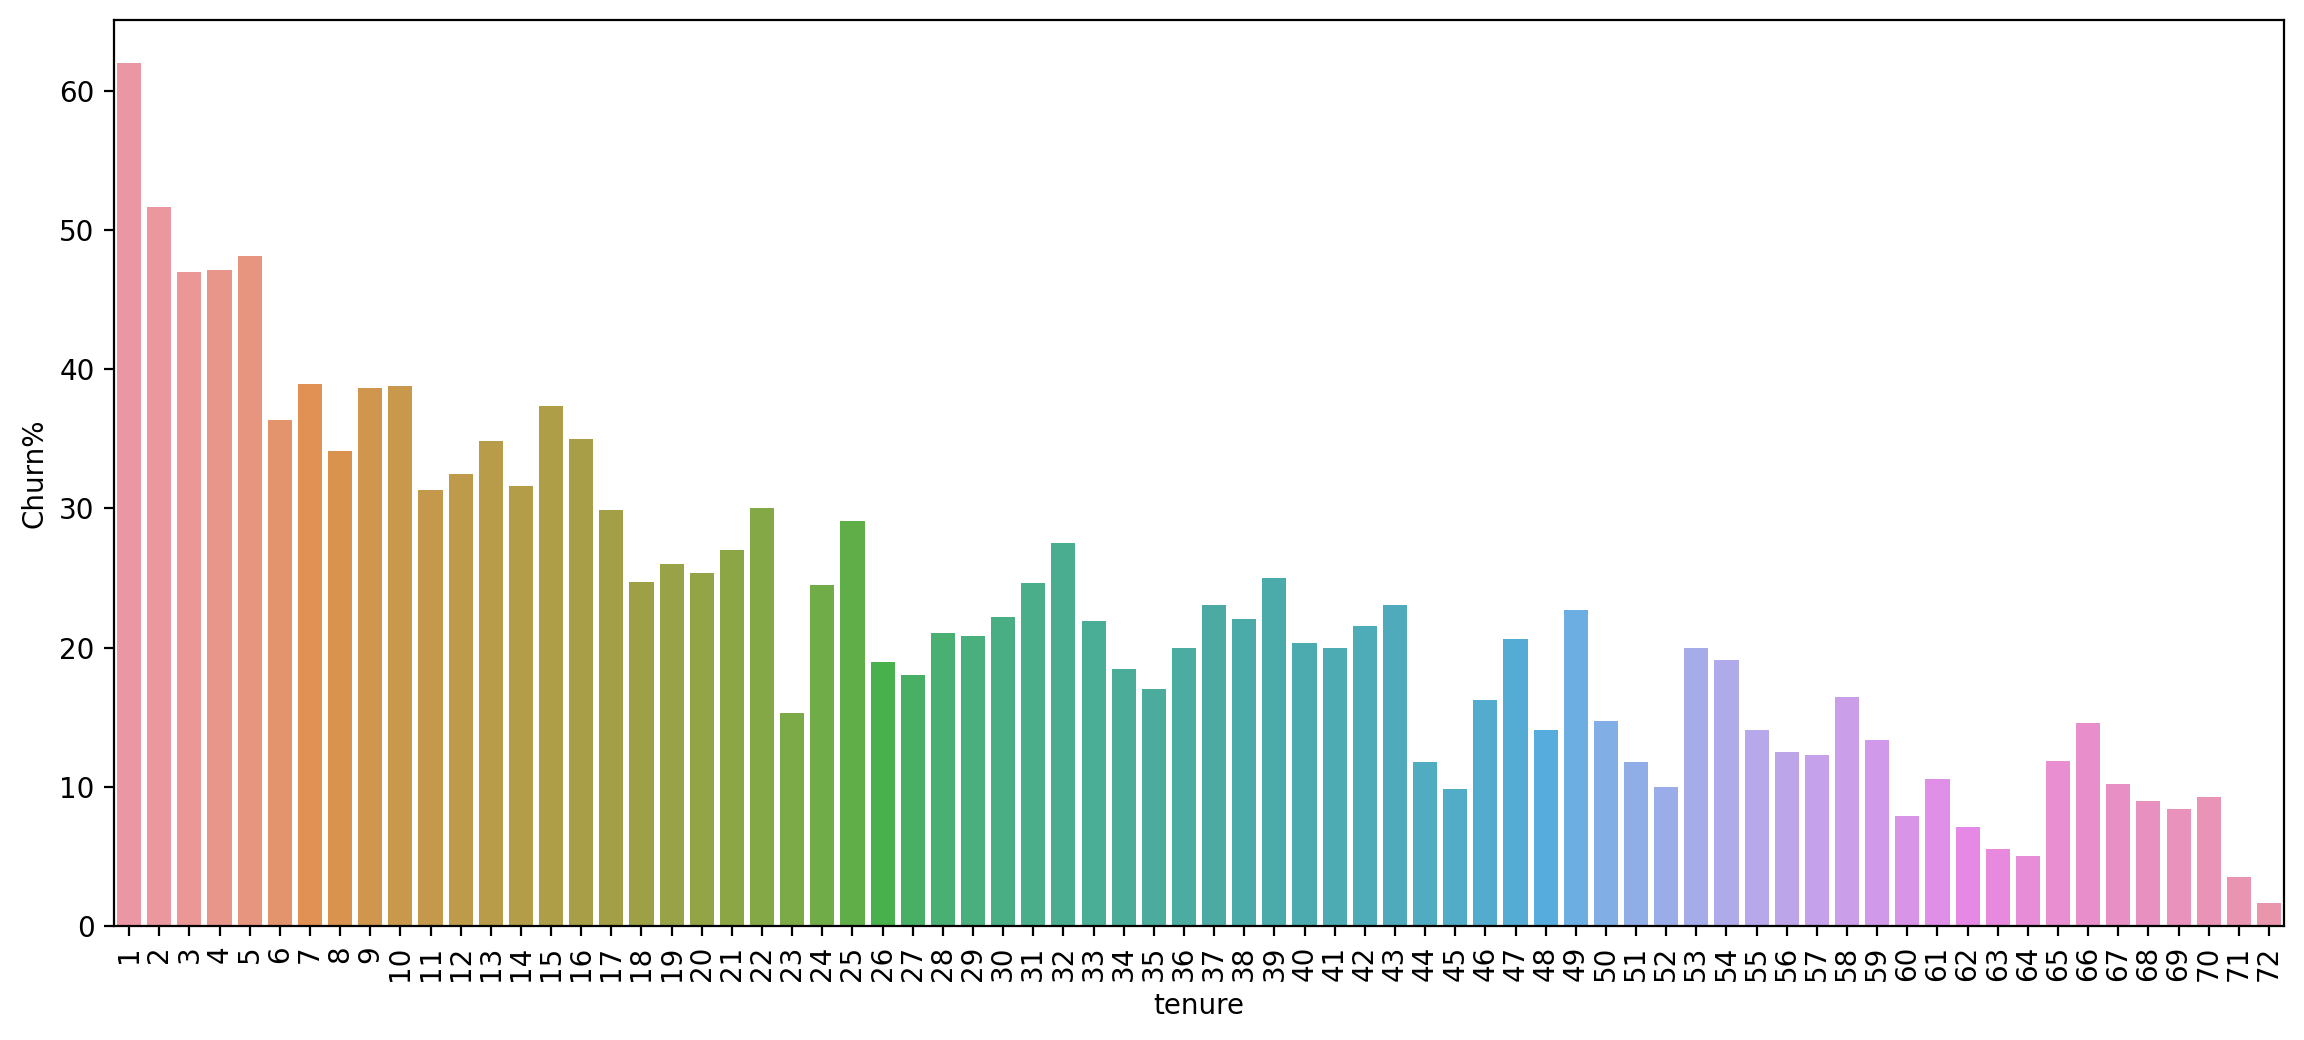

In [18]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=ten_group, y=ten_group['Churn%'], x= ten_group['tenure'])
plt.xticks(rotation=90);

### New customer tend to churn out more in general.

In [19]:
df.iloc[:,1:-1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [20]:
df = df.iloc[:,1:]   # get rid of customerID before getting dummy variables.

In [21]:
cat_cols = [cols for cols in df.select_dtypes(include='object')]
num_cols = [cols for cols in df.select_dtypes(exclude='object')]

In [22]:
a=[]
for col in cat_cols:
    a.append(df[col].unique())

In [23]:
cat_uni = pd.DataFrame({'cols':cat_cols,'unique':a}).set_index('cols')

Checking number of unique values in categorical columns

In [24]:
cat_uni

,unique
cols,
gender,"[Female, Male]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"
OnlineBackup,"[Yes, No, No internet service]"
DeviceProtection,"[No, Yes, No internet service]"


### Senior citizen is also categorical but it already has 0s and 1s as values.

In [25]:
dum_df = pd.get_dummies(df[cat_cols], drop_first=True)

In [26]:
df = df.drop(cat_cols, axis=1)

In [27]:
df = pd.concat([df,dum_df], axis=1)

In [28]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

### Now that I have created dummy variables of the categorical columns of data frame. Lets check the correlation among these features.

In [29]:
list_of_columns = df.columns
list_of_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [30]:
new_cat_cols = list_of_columns[3:]
new_cat_cols

Index(['TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [31]:
df_corr=df[new_cat_cols].corr()['Churn_Yes'].sort_values(ascending=False)
corr_churn = df_corr[1:]
corr_churn

InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
PaperlessBilling_Yes                     0.191454
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270
Contract_One year                       -0.178225
TotalCharges                            -0.199484
InternetService_No                      -0.227578


In [32]:
col_names=corr_churn.index

Text(0.5, 1.0, 'Feature Correlation to Churn')

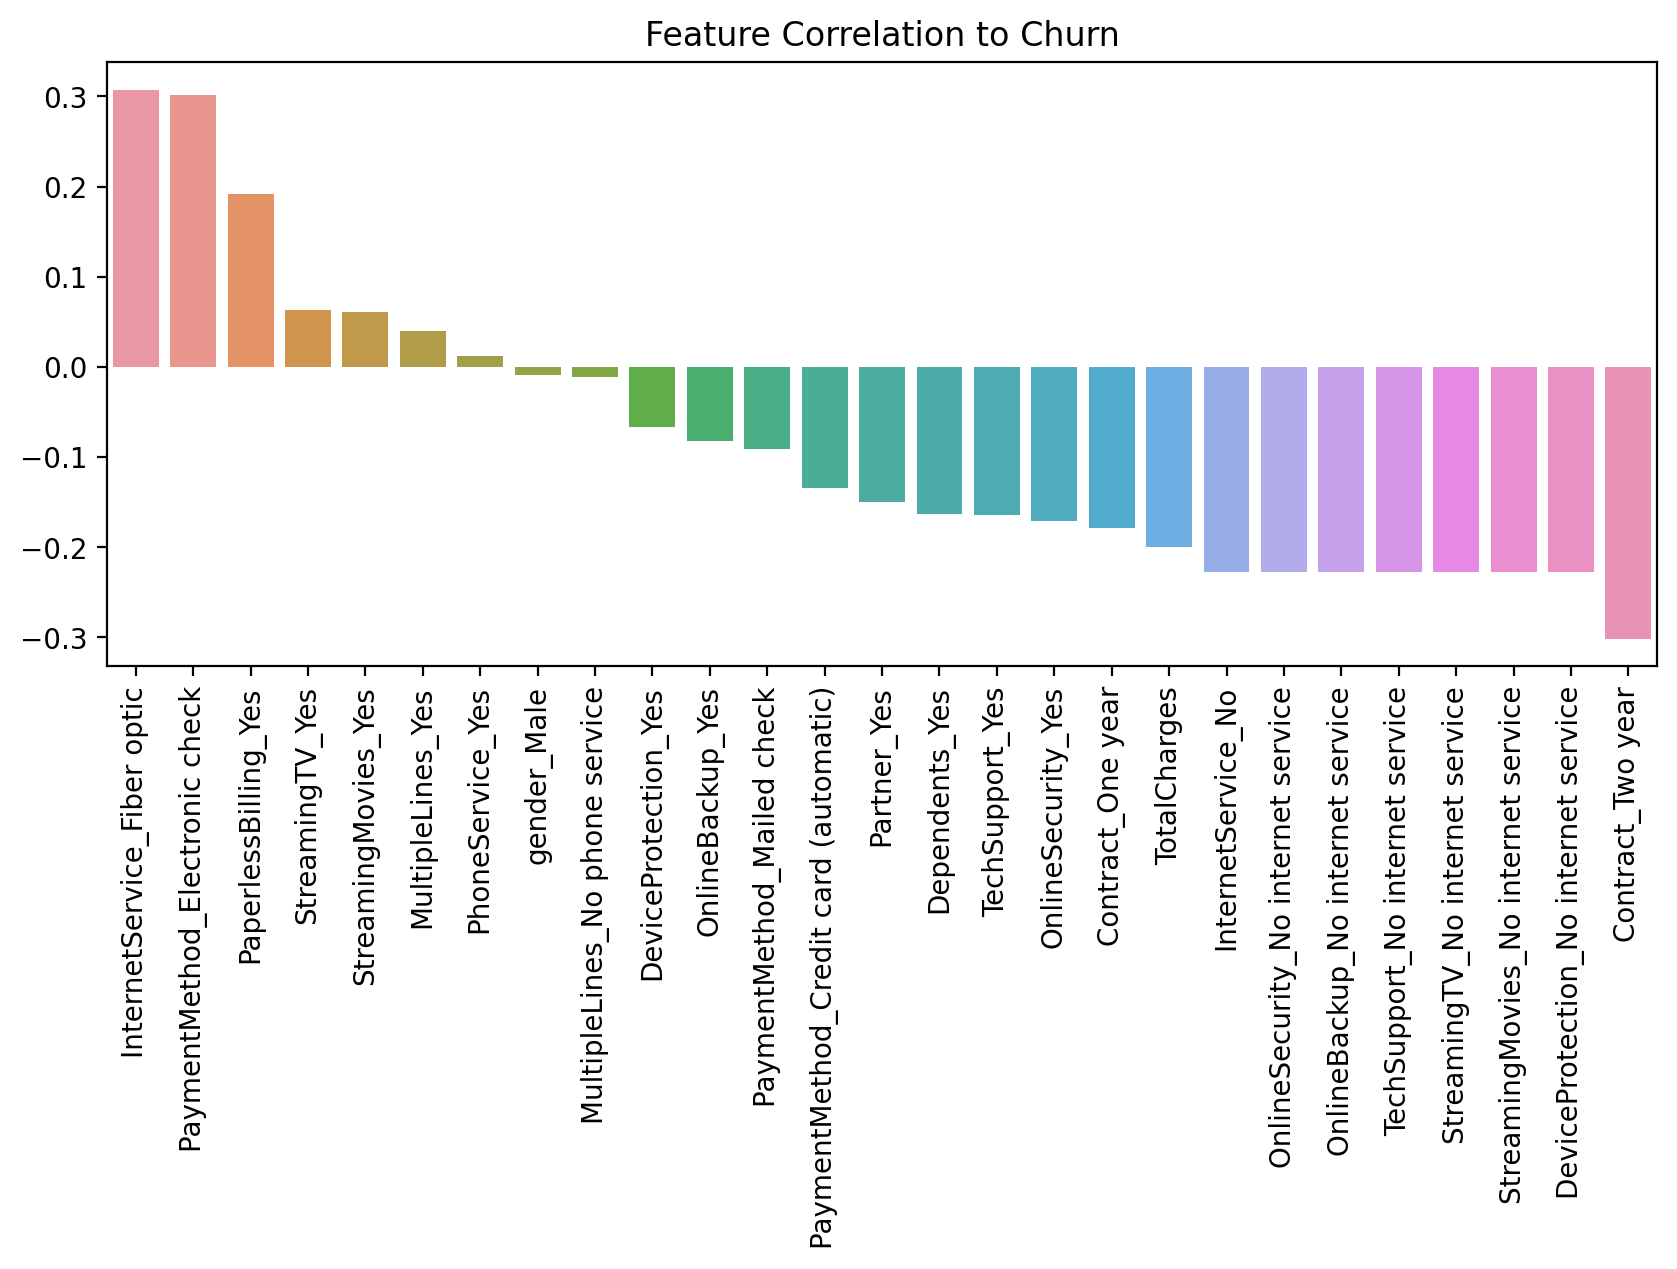

In [59]:
plt.figure(figsize=(10,4),dpi=200)

sns.barplot(x = corr_churn.index, y=corr_churn.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation to Churn");

## Setting up independent and dependent variables.

In [34]:
X = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

## Splitting into Test|Train and standardizing.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [37]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [38]:
scaled_X_test = scaler.transform(X_test)

### Now lets try to fit diffent models on this data
---
## 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_model  = LogisticRegression()

In [41]:
lr_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [42]:
lr_preds = lr_model.predict(scaled_X_test)

### Evaluating the model

In [43]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score

In [44]:
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1293
           1       0.67      0.56      0.61       465

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


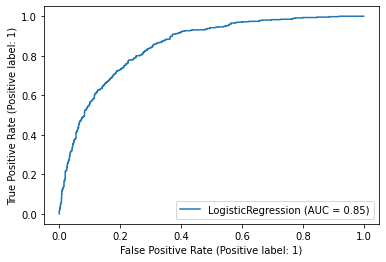

In [45]:
plot_roc_curve(lr_model,scaled_X_test,y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


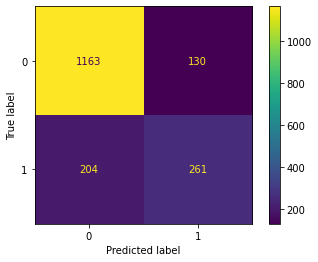

In [46]:
plot_confusion_matrix(lr_model,scaled_X_test,y_test);

## Simple Logistic regression has given us an accuracy score of 81%. Lets try out different models to see if we can get a perfromace better than this one.
---
### But first lets create a function that takes in a model fit the data onto it and then returns the classification report as this task will be repeated many times.

In [118]:
def run_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f'accuracy={accuracy_score(y_test,preds)}')
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test);

### Support Vector Classifier

In [111]:
from sklearn.svm import SVC

accuracy=0.735494880546075
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1293
           1       0.00      0.00      0.00       465

    accuracy                           0.74      1758
   macro avg       0.37      0.50      0.42      1758
weighted avg       0.54      0.74      0.62      1758



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

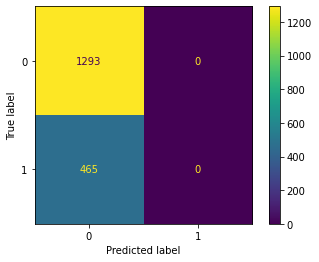

In [119]:
svc = SVC()
run_model(svc, X_train, X_test, y_train, y_test)

### SVC gave 74% accuracy.
## Lets now try knn for different values of K

In [48]:
from sklearn.neighbors import KNeighborsClassifier

K_values:1
accuracy=0.7104664391353811
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1293
           1       0.46      0.48      0.47       465

    accuracy                           0.71      1758
   macro avg       0.63      0.64      0.63      1758
weighted avg       0.72      0.71      0.71      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


K_values:10
accuracy=0.7753128555176336
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1293
           1       0.60      0.45      0.52       465

    accuracy                           0.78      1758
   macro avg       0.71      0.67      0.69      1758
weighted avg       0.76      0.78      0.76      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


K_values:15
accuracy=0.7736063708759955
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1293
           1       0.58      0.53      0.55       465

    accuracy                           0.77      1758
   macro avg       0.71      0.70      0.70      1758
weighted avg       0.77      0.77      0.77      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


K_values:25
accuracy=0.7895335608646189
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1293
           1       0.61      0.57      0.59       465

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.72      1758
weighted avg       0.78      0.79      0.79      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


K_values:35
accuracy=0.800910125142207
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1293
           1       0.63      0.59      0.61       465

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


K_values:50
accuracy=0.800910125142207
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1293
           1       0.63      0.58      0.61       465

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


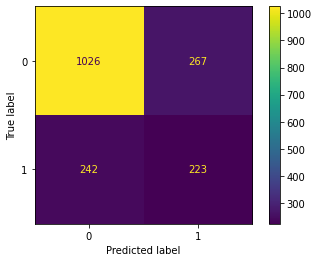

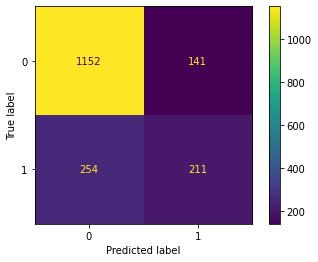

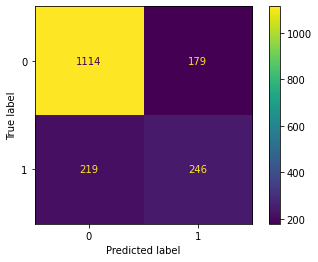

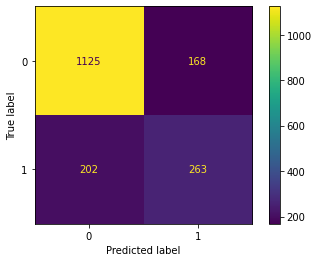

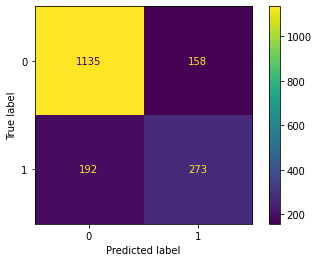

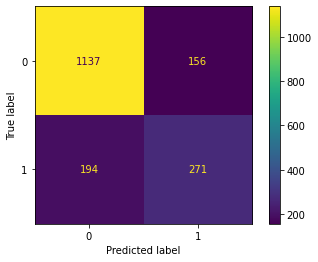

In [49]:
for k in [1,10,15,25,35,50]:
    knn = KNeighborsClassifier(n_neighbors=k)
    print(f'K_values:{k}')
    run_model(knn,scaled_X_train,scaled_X_test,y_train,y_test)
    

### Still the accuracy does not seem to go beyond 80%.
---
Lets try decision tree.

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree = DecisionTreeClassifier()

accuracy=0.7286689419795221
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1293
           1       0.49      0.52      0.50       465

    accuracy                           0.73      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.73      0.73      0.73      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


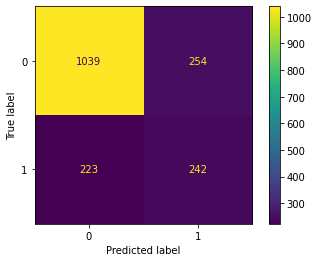

In [52]:
run_model(tree,X_train,X_test,y_train,y_test)

In [106]:
tree_imp_feat

,Feature_importances
TotalCharges,0.205839
MonthlyCharges,0.201043
tenure,0.200607
InternetService_Fiber optic,0.102826
PaperlessBilling_Yes,0.029402
gender_Male,0.026497
Partner_Yes,0.022681
SeniorCitizen,0.020344
Dependents_Yes,0.020135
OnlineBackup_Yes,0.019013


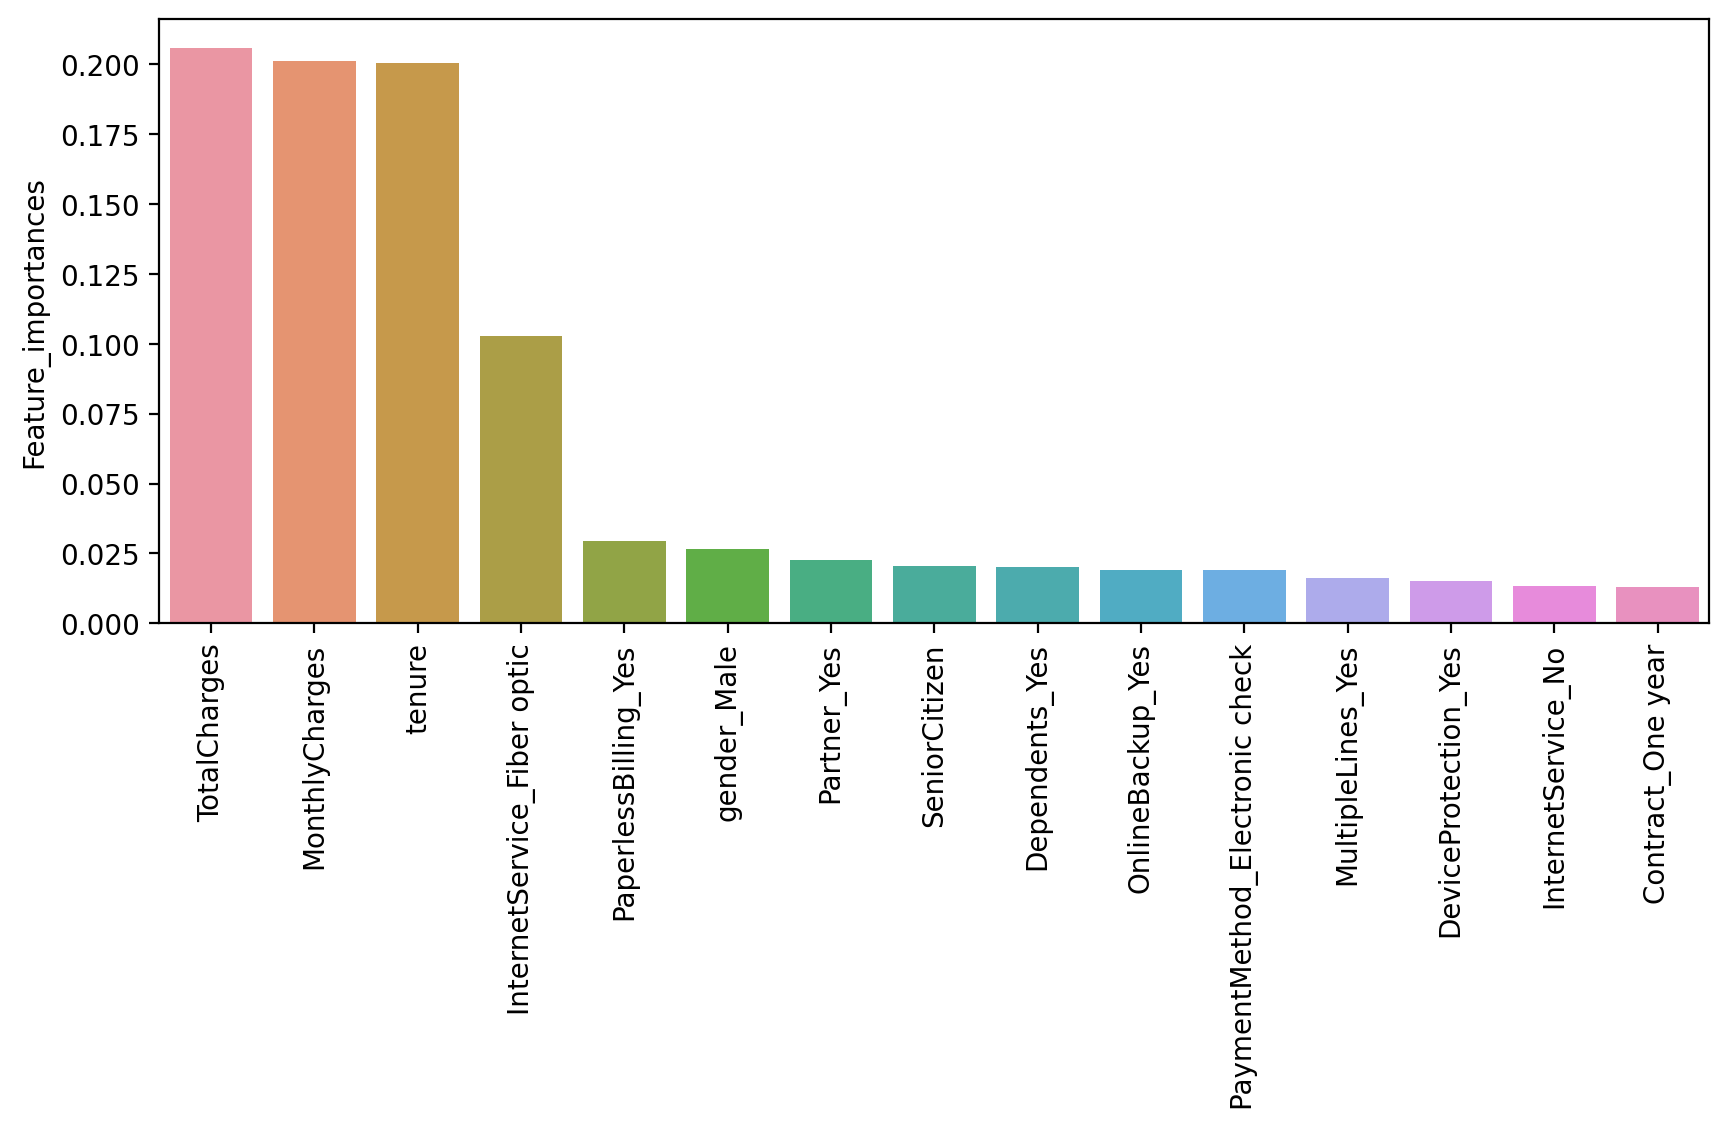

In [107]:
plt.figure(figsize=(10,4),dpi=200)
y=tree.feature_importances_
x = X.columns
tree_imp_feat = pd.DataFrame(y,x)
tree_imp_feat.columns = ['Feature_importances']
tree_imp_feat = tree_imp_feat.sort_values('Feature_importances', ascending=False).head(15)
sns.barplot(y=tree_imp_feat['Feature_importances'], x=tree_imp_feat.index)
plt.xticks(rotation=90);

accuracy is 73%. 
Lets try RandomForest with GridSearchCV
## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
forest = RandomForestClassifier()

In [55]:
param_grid = {'n_estimators':[25,35,60,80,110,140,160], 'max_depth':[2,3,5,7,9,11], 'criterion':['gini','entropy']}

In [56]:
grid_rf = GridSearchCV(forest,param_grid)

accuracy=0.8083048919226393
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1293
           1       0.69      0.51      0.58       465

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


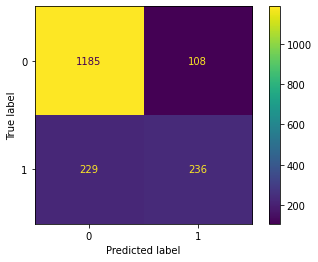

In [57]:
run_model(grid_rf,X_train,X_test,y_train,y_test)

In [58]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 80}

Accuracy is better than Decision tree. Now lets try Adaboosting.

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada_boost = AdaBoostClassifier()

accuracy=0.8088737201365188
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1293
           1       0.67      0.54      0.60       465

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


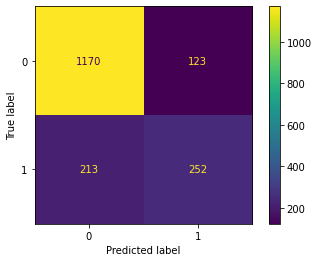

In [63]:
run_model(ada_boost, X_train, X_test, y_train, y_test)

In [65]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {'n_estimators':[25,35,75,130,170,210], 'learning_rate':[0.1,0.2,0.5,1.0]}
grid = GridSearchCV(ada_boost, param_grid)

accuracy=0.8048919226393629
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1293
           1       0.67      0.51      0.58       465

    accuracy                           0.80      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.79      0.80      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


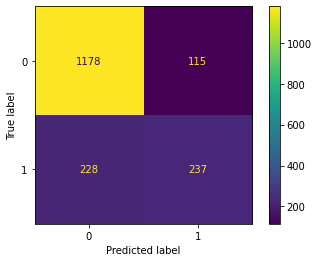

In [82]:
run_model(grid, X_train, X_test, y_train, y_test)


In [83]:
grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 170}

## Finally trying gradient boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

accuracy=0.8111490329920364
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1293
           1       0.68      0.53      0.60       465

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


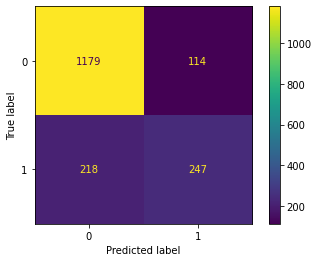

In [109]:
g_boost = GradientBoostingClassifier()
run_model(g_boost,X_train, X_test, y_train, y_test)

## Conclusion:Gradient boosting and Logistic regression seem to give best result but not by huge margin.